In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')

# Module 3 - Project: pendulum solutions

In this notebook, you will compare two solutions for the motion of a swinging pendulum

1. linearized solution for $\ddot{\theta}(t) = -\frac{g}{L}\theta$
2. numerical solution for $\ddot{\theta}(t) = -\frac{g}{L}\sin\theta$

You can choose your own pendulum length $L$ for the analysis. Try tying a string to an object and recording the swinging of the pendulum. You can estimate the initial angle and its period of oscillation. 

## 1. Linear solution

The linear solution is the first order Taylor series approximation for the equation of motion

$\ddot{\theta}(t) = -\frac{g}{L}\sin\theta \approx -\frac{g}{L}\theta$

The solution to this simple harmonic oscillator function is

$\theta(t) = \theta_0 \cos\omega t + \frac{\dot{\theta}_0}{\omega}\sin\omega t$

where $\theta_0$ is the initial angle, $\dot{\theta}_0$ is the initial angular velocity [in rad/s], and $\omega=\sqrt{\frac{g}{L}}$. 

Here, you can plot the solution for 

- $L = 1~m$
- $g = 9.81~m/s^2$
- $\theta_0 = \frac{\pi}{4} = [45^o]$
- $\dot{\theta}_0 = 0~rad/s$

Text(0, 0.5, '$\\theta(t)$ [degrees]')

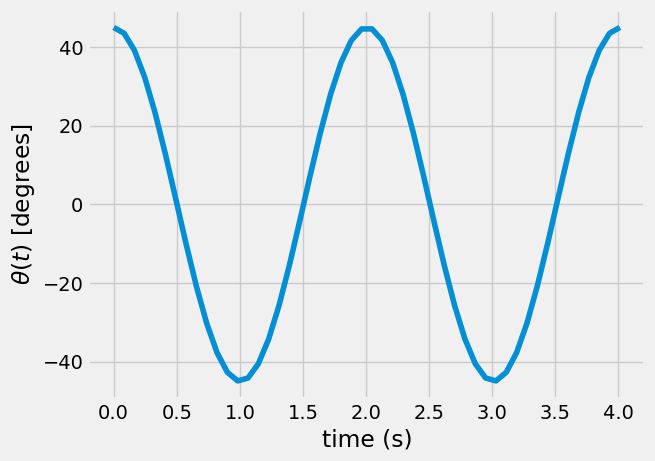

In [21]:
g = 9.81 # m/s/s
L = 1 # m
w = np.sqrt(g/L) # rad/s
t = np.linspace(0, 4*np.pi/w) # 2 time periods of motion
theta0 = np.pi/4
dtheta0 = 0

theta = theta0*np.cos(w*t) + dtheta0/w*np.sin(w*t)

plt.plot(t, theta*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')

In the plot above, you should see harmonic motion. If it starts from rest at $60^o$ the pendulum will swing to $-60^o$ in $\frac{T}{2} =\frac{\pi}{\omega}$ seconds. 

## 2. Numerical solution 

In the numerical solution, there is no need to linearize the equation of motion. You _do_ need to create a __state__ variable as such

$\mathbf{x} = [x_1,~x_2] = [\theta,~\dot{\theta}]$

now, you can describe 2 first order equations in a function as such

1. $\dot{x}_1 = x_2$
2. $\dot{x}_2 = \ddot{\theta} =-\frac{g}{L}\sin\theta$

putting this in a Python function it becomes



In [22]:
g = 9.81
L = 1
def pendulum(t, x):
    '''pendulum equations of motion for theta and dtheta/dt
    arguments
    ---------
    t: current time
    x: current state variable [theta, dtheta/dt]
    outputs
    -------
    dx: current derivative of state variable [dtheta/dt, ddtheta/ddt]'''
    
    dx = np.zeros(len(x))
    dx[0] = x[1]
    dx[1] = -g/L*np.sin(x[0])
    return dx

This function `pendulum` defines the differential equation. Next, integrate with `solve_ivp` to find $\theta(t)$ as such. 

> __Note__: Here, I am using some previously defined values:
> - `theta0`: the initial angle
> - `dtheta0`: the initial angular velocity
> - `t`: the timesteps from the previous linear analysis $t = (0...2T)$

Text(0, 0.5, '$\\theta(t)$ [degrees]')

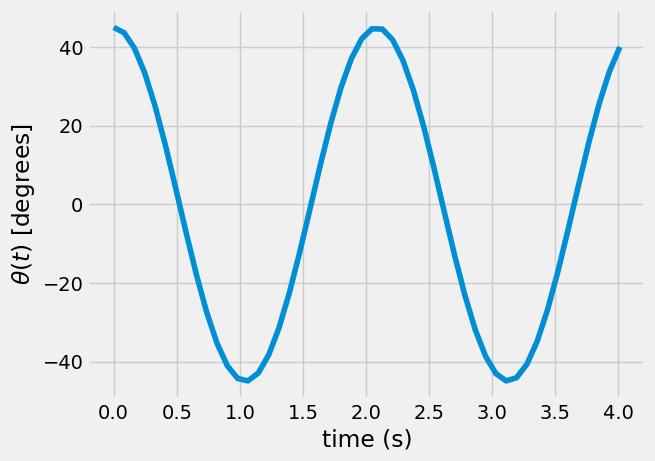

In [23]:
from scipy.integrate import solve_ivp

sol = solve_ivp(pendulum, [0, t.max()], [theta0, 0], t_eval = t)
plt.plot(sol.t, sol.y[0]*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')

## Comparing results

At first glance, it would seem both solutions are _close enough_, but here you can plot them together and compare. 

Text(0, 0.5, '$\\theta(t)$ [degrees]')

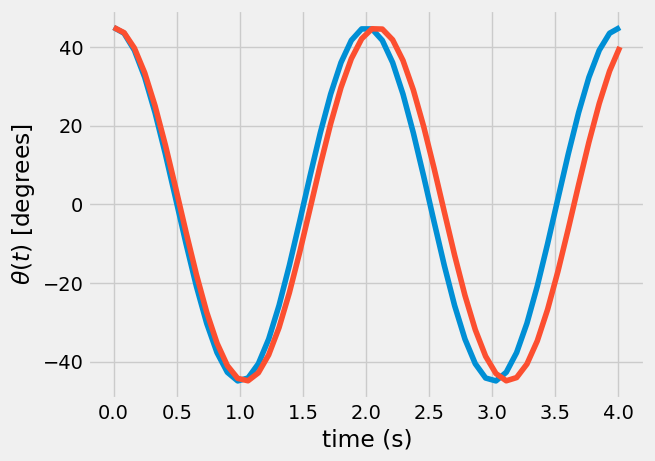

In [24]:
plt.plot(t, theta*180/np.pi)
plt.plot(sol.t, sol.y[0]*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')

You should notice a difference in time period between the two solutions, which means the natural frequencies are different.

You can also consider angular velocity and angular acceleration, below a set of 3 plots are shown for $\theta(t),~\dot{\theta}(t),~and~\ddot{\theta}(t)$. 


In [25]:
dtheta = -theta0*w*np.sin(w*t) + dtheta0*np.cos(w*t)
ddtheta = -theta0*w**2*np.cos(w*t) - dtheta0*w*np.sin(w*t)

ddtheta_numerical = -g/L*np.sin(sol.y[0]) # using equation of motion

Text(0, 0.5, '$\\ddot{\\theta}(t)$ (rad/s$^2$)')

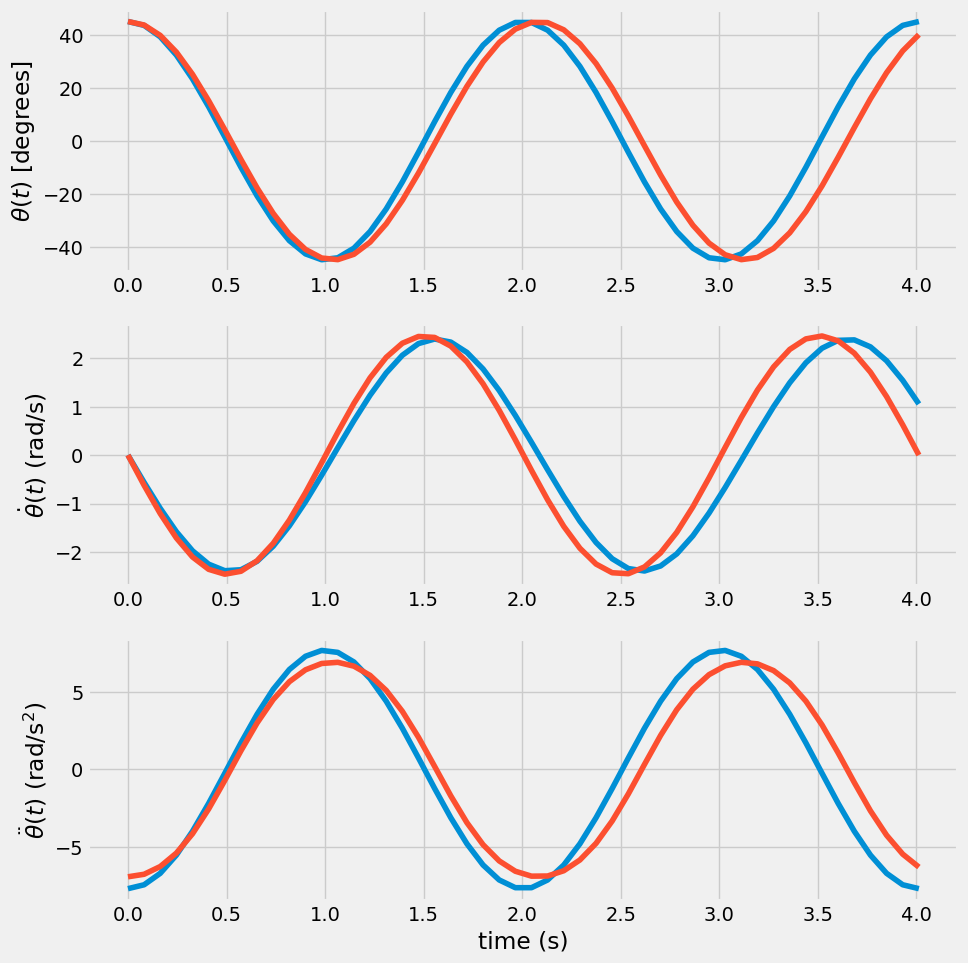

In [26]:
plt.figure(figsize= (10, 11))
plt.subplot(311)
plt.plot(t, theta*180/np.pi)
plt.plot(sol.t, sol.y[0]*180/np.pi)

plt.ylabel(r'$\theta(t)$ [degrees]')

plt.subplot(312)
plt.plot(sol.t, sol.y[1])
plt.plot(t, dtheta)

plt.ylabel(r'$\dot{\theta}(t)$ (rad/s)')


plt.subplot(313)
plt.plot(t, ddtheta)
plt.plot(t, ddtheta_numerical)
plt.xlabel('time (s)')
plt.ylabel(r'$\ddot{\theta}(t)$ (rad/s$^2$)')


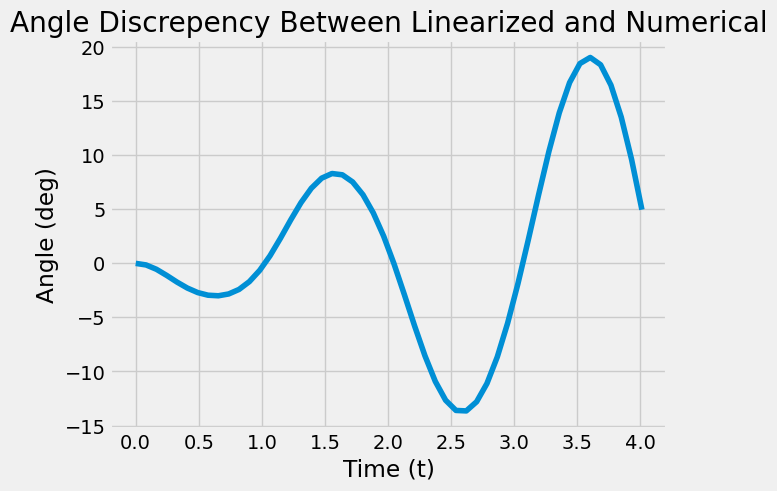

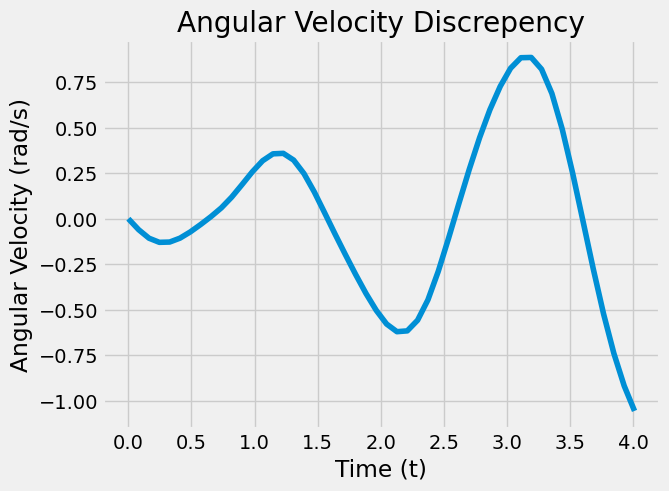

Text(0.5, 0, 'Time (t)')

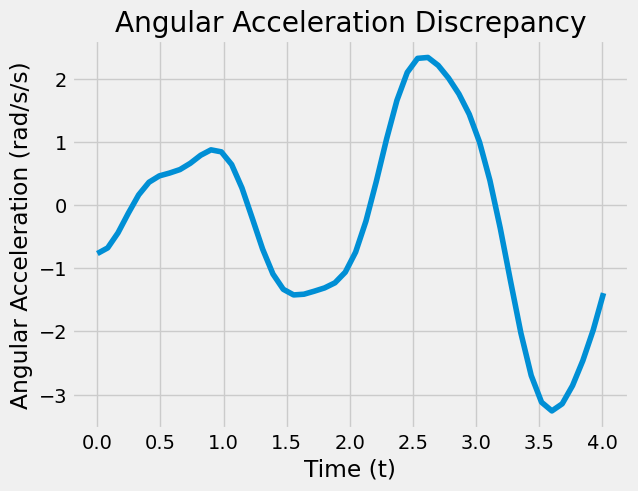

In [31]:
plt.plot(t, theta*180/np.pi - sol.y[0]*180/np.pi)
plt.title("Angle Discrepency Between Linearized and Numerical")
plt.ylabel("Angle (deg)")
plt.xlabel("Time (t)")
plt.show()
plt.plot(t, dtheta - sol.y[1])
plt.title("Angular Velocity Discrepency")
plt.ylabel("Angular Velocity (rad/s)")
plt.xlabel("Time (t)")
plt.show()
plt.plot(t, ddtheta - ddtheta_numerical)
plt.title("Angular Acceleration Discrepancy")
plt.ylabel("Angular Acceleration (rad/s/s)")
plt.xlabel("Time (t)")

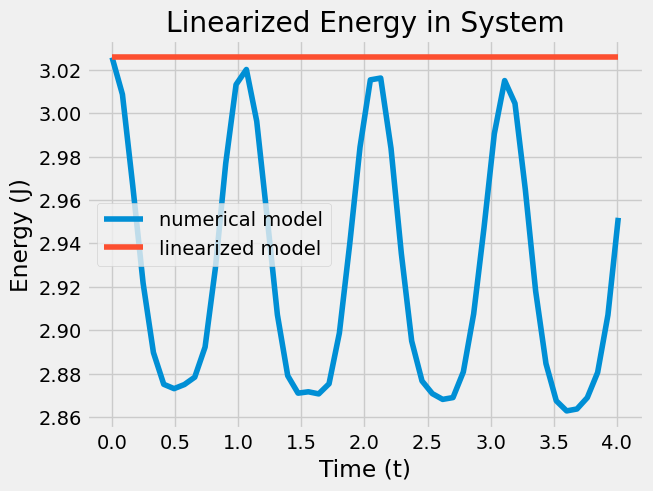

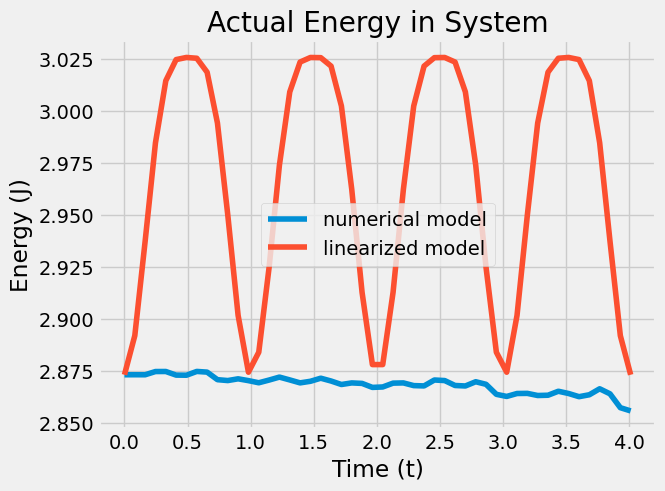

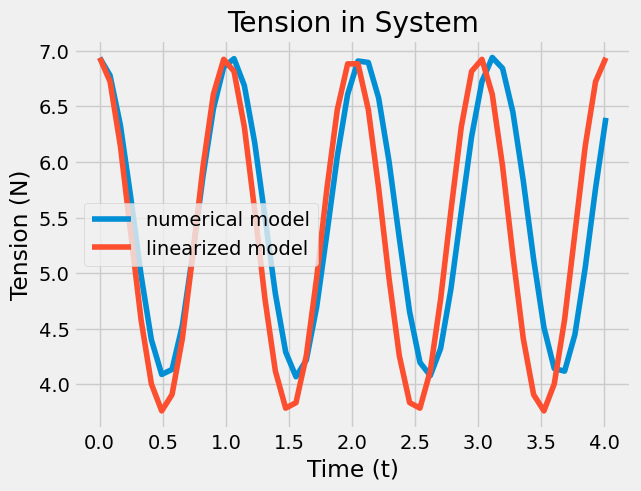

Text(0.5, 0, 'Time (t)')

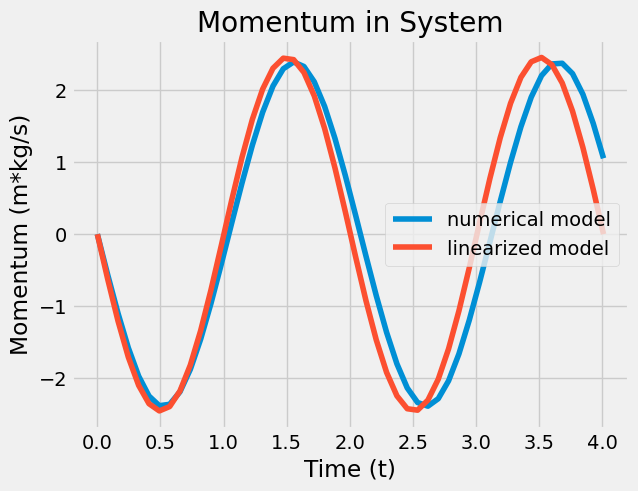

In [34]:
# comparing energies
E = lambda a, w: 0.5*g*L*(a**2) + 0.5*(L**2)*(w**2)

plt.plot(t, E(sol.y[0], sol.y[1]), label='numerical model')
plt.plot(t, E(theta, dtheta), label='linearized model')
plt.legend()
plt.title("Linearized Energy in System")
plt.ylabel("Energy (J)")
plt.xlabel("Time (t)")
plt.show()

E_actual = lambda a, w: 1*g*L*(1-np.cos(a)) + 0.5*1*(L**2)*(w**2)

plt.plot(t, E_actual(sol.y[0], sol.y[1]), label='numerical model')
plt.plot(t, E_actual(theta, dtheta), label='linearized model')
plt.legend()
plt.title("Actual Energy in System")
plt.ylabel("Energy (J)")
plt.xlabel("Time (t)")
plt.show()

T = lambda a, w: 1 * g * L * np.cos(a)-1*L*w**2
plt.plot(t, T(sol.y[0], sol.y[1]), label='numerical model')
plt.plot(t, T(theta, dtheta), label='linearized model')
plt.legend()
plt.title("Tension in System")
plt.ylabel("Tension (N)")
plt.xlabel("Time (t)")
plt.show()

p = lambda w: L*1*w
plt.plot(t, p(sol.y[1]), label='numerical model')
plt.plot(t, p(dtheta), label='linearized model')
plt.legend()
plt.title("Momentum in System")
plt.ylabel("Momentum (m*kg/s)")
plt.xlabel("Time (t)")

### Question prompt
- Where do you see the biggest difference between the linearized solution and the numerical solution?

We see the biggest difference between the linearized solution and numerical solution when $\theta$ and $\sin(\theta)$ diverge. This primarily happens when our initial angle is substantially large enough to make the estimation in the linearized one inaccurate. This largest difference occurs at the second max amplitude on the far left of the graph, since each pendulum will have diverged, so they will have different amplitudes, and since their frequencies are different, they will peak at different points, creating large variance.

- What are ways you can quantify the error between then two results? Is one solution more _accurate_?

We can quantify the error between the two results by measuring the difference between the two curves at each time interval $t$, and analyze the percent error between them. The numerical solution is likely more accurate, but numerical solutions also tend to either decrease or increase the energy in the system, rather than keep it uniform, like the linearized solution would give.

- What other calculations can you compare between these two solutions?

We can compare the actual $\Delta \theta$, which is what we measure in the above graph. We can also compare the difference in period $T$, so see how much that diverges. We can also analyze the amplitude, and see how the linearized solution doesn't lose energy, while the numerical may appear to do so. Regarding amplitudes, we can compare the amplitude for the angle, angular velocity, and angular acceleration so see how they diverge. We can also compare the momentum between each model, but that is kind of irrelevant after comparing angular velocity, since momentum is just angular velocity scaled. We can also compare the Tension in the rope between the two models, because we should account for the most extreme possiblities in choosing the material for the cable in our pendulum system.